# Jupyter Notebook per Abilità Informatiche
Progetto Covid-19, regione Puglia

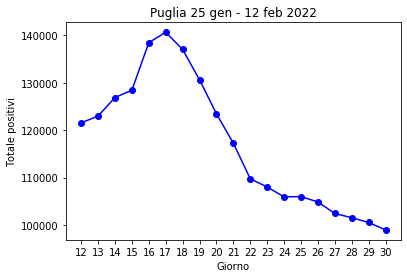

In [7]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy
from scipy.stats import poisson


x = []
y = []

#leggo i dati 
for line in open('daticovid.txt', 'r'):
    lines = [i for i in line.split()]
    x.append(lines[0])
    y.append(int(lines[1]))
    
#plot totale dei positivi nel periodo considerato
plt.title("Puglia 25 gen - 12 feb 2022")
plt.xlabel('Giorno')
plt.ylabel('Totale positivi')
plt.plot(x, y, marker = 'o', c = 'b')
  
plt.show()

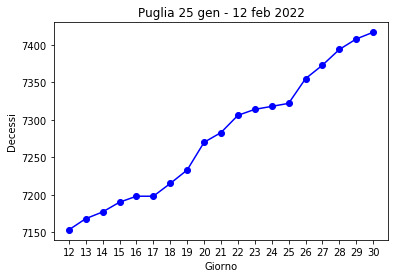

In [8]:
x=[]
y=[]

#leggo i dati 
for line in open('decessi.txt', 'r'):
    lines = [i for i in line.split()]
    x.append(lines[0])
    y.append(int(lines[1]))
    
#plot totale dei positivi nel periodo considerato
plt.title("Puglia 25 gen - 12 feb 2022")
plt.xlabel('Giorno')
plt.ylabel('Decessi')
plt.plot(x, y, marker = 'o', c = 'b')
  
plt.show()

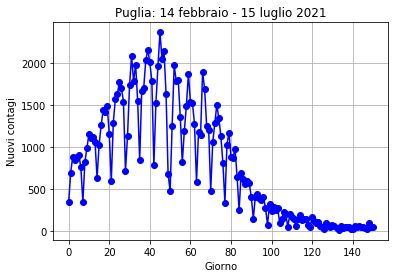

In [9]:
x=[]
y=[]


#leggo i dati 
for line in open('test.txt', 'r'):
    lines = [i for i in line.split()]
    x.append(int(lines[1]))
    y.append(int(lines[0]))
    

for i in range(0,151):
    x[i]=x[i]-357


#plot dei nuovi positivi nel periodo considerato
plt.title("Puglia: 14 febbraio - 15 luglio 2021")
plt.xlabel('Giorno')
plt.ylabel('Nuovi contagi')
plt.plot(x, y, marker = 'o', c = 'b')
plt.grid()
plt.show()

In [10]:
#definisco la funzione di Gompertz
#x0 -> giorno in cui è partito il contagio con N0=1 caso
def Gomp(x,K,r,x0):
    c=np.log(1./K)
    g=K*np.exp(c*np.exp(-r*np.array(x-x0)))
    return g


#differenze finite funzione di Gompertz
def diff_Gomp(x,K,r,x0):
    h=[None]*np.size(x)
    for i in range(0,np.size(x)-1):
        h[i]=Gomp(x[i+1],K,r,x0)-Gomp(x[i],K,r,x0)
    return h


In [11]:
#definisco la funzione che calcola la log-likelihood 
#assumo che il set di dati sui nuovi contagi sia descritto da una poissoniana
#devo calcolare la prob di avere il numero di nuovi contagi osservato con una media data dalla valutazione di diff_gomp
#punto per punto, cioé giorno per giorno.
def likelihood(x,y,K,r,x0):
    
    l=[None]*152
    z=[None]*152
    #poisson.pmf(k,m)-> k è l'evento, m la media
    for i in range(0,151):
        z[i]=poisson.pmf(y[i],diff_Gomp(x[i],K,r,x0))
        l[i]=np.log(z[i])
    return sum(l)

In [13]:
#definisco un flat (uninformative) prior sui parametri
def log_prior(theta):
    K, r, x0 = theta
    if x0 > 0. and r >0. and K>0.:
        return 0.0
    return -np.inf


def log_pos(theta, x, y):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + likelihood(x,y,theta)


In [17]:
import emcee

pos = [70.,0.3] + 1e-2 * np.random.randn(16, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_pos, args=(x,y))
sampler.run_mcmc(pos, 2000, progress=True);


emcee: Exception while calling your likelihood function:
  params: [70.00203383  0.31494767]
  args: ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150], [345, 694, 883, 844, 874, 905, 758, 343, 823, 991, 1154, 1104, 1123, 1053, 631, 1021, 1261, 1438, 1418, 1483, 1155, 594, 1286, 1571, 1634, 1774, 1700, 1542, 715, 1126, 1734, 2082, 1785, 1983, 1546, 844, 1664, 1709, 2033, 2162, 2008, 1788, 786, 1527, 1

Traceback (most recent call last):
  File "C:\Users\anton\anaconda3\lib\site-packages\emcee\ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-13-c07e62030939>", line 10, in log_pos
    lp = log_prior(theta)
  File "<ipython-input-13-c07e62030939>", line 3, in log_prior
    K, r, x0 = theta
ValueError: not enough values to unpack (expected 3, got 2)


ValueError: not enough values to unpack (expected 3, got 2)